In [1]:
# Parameters
file_path = "NFLX.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,418.399994,437.019989,417.709991,427.549988,427.549988,8174700
1,2023-08-24,425.410004,427.589996,406.170013,406.929993,406.929993,5687800
2,2023-08-25,412.000000,419.250000,407.559998,416.029999,416.029999,5390900
3,2023-08-28,418.040009,419.829987,413.269989,418.059998,418.059998,2928600
4,2023-08-29,416.000000,432.170013,414.500000,429.989990,429.989990,4486700
...,...,...,...,...,...,...,...
247,2024-08-16,669.429993,680.229980,665.359985,674.070007,674.070007,3511000
248,2024-08-19,674.070007,688.840027,672.909973,688.530029,688.530029,3016200
249,2024-08-20,688.859985,711.330017,688.250000,698.539978,698.539978,4813100
250,2024-08-21,697.000000,701.000000,691.380005,697.119995,697.119995,2235300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,427.549988
1,2023-08-24,406.929993
2,2023-08-25,416.029999
3,2023-08-28,418.059998
4,2023-08-29,429.989990
...,...,...
247,2024-08-16,674.070007
248,2024-08-19,688.530029
249,2024-08-20,698.539978
250,2024-08-21,697.119995


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88330/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,427.549988
2023-08-24,406.929993
2023-08-25,416.029999
2023-08-28,418.059998
2023-08-29,429.989990
...,...
2024-08-16,674.070007
2024-08-19,688.530029
2024-08-20,698.539978


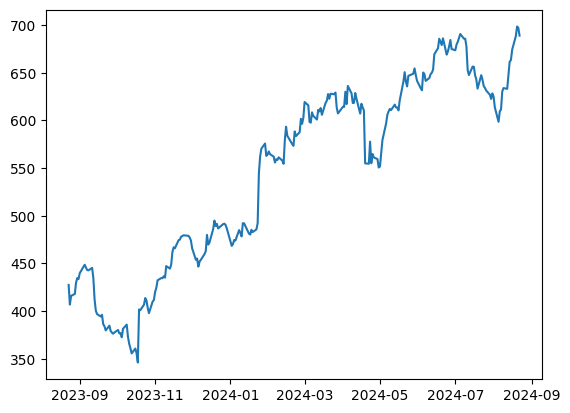

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,427.549988,406.929993,416.029999,418.059998,429.989990,434.670013,433.679993,439.880005,448.679993,...,379.809998,384.799988,379.250000,377.589996,376.359985,377.600006,380.329987,376.750000,376.899994,372.589996
1,2023-10-06,406.929993,416.029999,418.059998,429.989990,434.670013,433.679993,439.880005,448.679993,445.760010,...,384.799988,379.250000,377.589996,376.359985,377.600006,380.329987,376.750000,376.899994,372.589996,381.510010
2,2023-10-09,416.029999,418.059998,429.989990,434.670013,433.679993,439.880005,448.679993,445.760010,443.140015,...,379.250000,377.589996,376.359985,377.600006,380.329987,376.750000,376.899994,372.589996,381.510010,385.950012
3,2023-10-10,418.059998,429.989990,434.670013,433.679993,439.880005,448.679993,445.760010,443.140015,442.799988,...,377.589996,376.359985,377.600006,380.329987,376.750000,376.899994,372.589996,381.510010,385.950012,373.320007
4,2023-10-11,429.989990,434.670013,433.679993,439.880005,448.679993,445.760010,443.140015,442.799988,445.359985,...,376.359985,377.600006,380.329987,376.750000,376.899994,372.589996,381.510010,385.950012,373.320007,365.929993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,690.650024,685.739990,685.739990,677.650024,652.750000,647.599976,656.450012,656.320007,647.460022,...,598.549988,609.570007,611.479980,630.349976,633.940002,633.140015,648.020020,661.679993,663.219971,674.070007
218,2024-08-19,685.739990,685.739990,677.650024,652.750000,647.599976,656.450012,656.320007,647.460022,643.039978,...,609.570007,611.479980,630.349976,633.940002,633.140015,648.020020,661.679993,663.219971,674.070007,688.530029
219,2024-08-20,685.739990,677.650024,652.750000,647.599976,656.450012,656.320007,647.460022,643.039978,633.340027,...,611.479980,630.349976,633.940002,633.140015,648.020020,661.679993,663.219971,674.070007,688.530029,698.539978
220,2024-08-21,677.650024,652.750000,647.599976,656.450012,656.320007,647.460022,643.039978,633.340027,647.500000,...,630.349976,633.940002,633.140015,648.020020,661.679993,663.219971,674.070007,688.530029,698.539978,697.119995


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

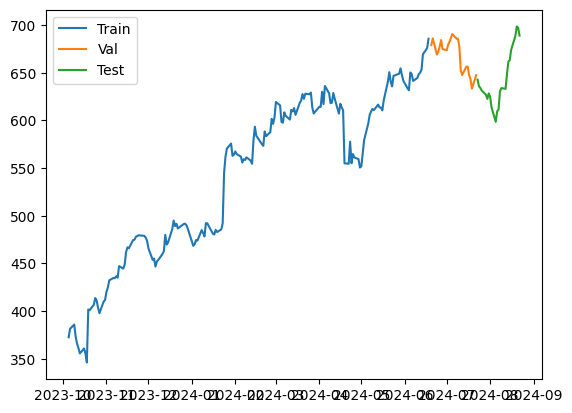

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 718ms/step - loss: 289512.2500 - mean_absolute_error: 529.1492

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 294980.2188 - mean_absolute_error: 535.5086 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 295412.5938 - mean_absolute_error: 536.1216 - val_loss: 443173.5312 - val_mean_absolute_error: 665.5054


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 320749.1250 - mean_absolute_error: 560.7045

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 299084.5000 - mean_absolute_error: 539.9226

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 297300.2188 - mean_absolute_error: 538.2944 - val_loss: 436010.5000 - val_mean_absolute_error: 660.1019


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 277509.7500 - mean_absolute_error: 520.0539

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 283229.1562 - mean_absolute_error: 524.8395

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 283597.1562 - mean_absolute_error: 525.2802 - val_loss: 419483.1250 - val_mean_absolute_error: 647.4620


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 239584.8750 - mean_absolute_error: 481.2488

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 257883.2812 - mean_absolute_error: 499.8351

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 259681.3125 - mean_absolute_error: 501.6799

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 260993.8750 - mean_absolute_error: 503.1418

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 262446.5625 - mean_absolute_error: 504.7061 - val_loss: 384222.8750 - val_mean_absolute_error: 619.6342


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 248742.9062 - mean_absolute_error: 489.6976

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 245520.9062 - mean_absolute_error: 487.2911

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 244773.9531 - mean_absolute_error: 486.7260

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 238183.8125 - mean_absolute_error: 479.8534 - val_loss: 317375.0625 - val_mean_absolute_error: 563.1140


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 161110.7500 - mean_absolute_error: 391.2719

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 168089.6406 - mean_absolute_error: 400.3734

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 166480.1719 - mean_absolute_error: 398.3868 - val_loss: 200574.5625 - val_mean_absolute_error: 447.5455


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 103621.0859 - mean_absolute_error: 311.3115

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92871.5078 - mean_absolute_error: 290.9455 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 87260.1328 - mean_absolute_error: 279.4073 - val_loss: 64427.3750 - val_mean_absolute_error: 253.2731


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22591.4746 - mean_absolute_error: 129.8201

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17255.9102 - mean_absolute_error: 110.2273

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16201.2930 - mean_absolute_error: 105.0817

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15924.2764 - mean_absolute_error: 103.6396 - val_loss: 328.2207 - val_mean_absolute_error: 16.7498


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18270.2383 - mean_absolute_error: 108.2254

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24468.6875 - mean_absolute_error: 128.7248

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24350.8340 - mean_absolute_error: 128.5871 - val_loss: 2378.4158 - val_mean_absolute_error: 45.8401


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11708.0000 - mean_absolute_error: 81.4683

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11375.8750 - mean_absolute_error: 82.1284

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10908.5186 - mean_absolute_error: 81.3398 - val_loss: 24528.1680 - val_mean_absolute_error: 155.7310


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8425.6211 - mean_absolute_error: 82.4933

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8978.5996 - mean_absolute_error: 82.1899

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9240.9668 - mean_absolute_error: 83.1274 - val_loss: 36218.7891 - val_mean_absolute_error: 189.5858


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9204.9043 - mean_absolute_error: 79.6287

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10085.7490 - mean_absolute_error: 84.2975

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10078.6250 - mean_absolute_error: 84.6285 - val_loss: 24442.4746 - val_mean_absolute_error: 155.4558


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7190.6851 - mean_absolute_error: 76.2045

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7396.5205 - mean_absolute_error: 77.6813

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7433.7612 - mean_absolute_error: 77.8058 - val_loss: 12590.3896 - val_mean_absolute_error: 110.9755


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8102.1631 - mean_absolute_error: 78.0861

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8028.8682 - mean_absolute_error: 76.0518

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7990.6924 - mean_absolute_error: 75.5091 - val_loss: 11549.9023 - val_mean_absolute_error: 106.1964


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6082.2705 - mean_absolute_error: 65.0912

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6867.4517 - mean_absolute_error: 70.5485

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7080.8550 - mean_absolute_error: 72.1433 - val_loss: 18243.2441 - val_mean_absolute_error: 134.0644


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6743.9668 - mean_absolute_error: 75.8758

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7265.6738 - mean_absolute_error: 77.3502

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7222.9033 - mean_absolute_error: 77.1265 - val_loss: 18319.3965 - val_mean_absolute_error: 134.3775


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7130.8506 - mean_absolute_error: 77.7685

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6355.2437 - mean_absolute_error: 72.5008

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6289.9507 - mean_absolute_error: 72.0536 - val_loss: 13187.5186 - val_mean_absolute_error: 113.7413


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6047.2246 - mean_absolute_error: 69.0405

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5356.4824 - mean_absolute_error: 64.8395

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5281.4502 - mean_absolute_error: 64.2413 - val_loss: 12733.3154 - val_mean_absolute_error: 111.8744


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3750.6106 - mean_absolute_error: 57.6076

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4077.0059 - mean_absolute_error: 58.2866

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4034.4731 - mean_absolute_error: 57.6077 - val_loss: 7504.8433 - val_mean_absolute_error: 85.4445


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2609.4368 - mean_absolute_error: 43.4581

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2725.4761 - mean_absolute_error: 45.4472

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2562.9072 - mean_absolute_error: 44.0218 - val_loss: 4720.2896 - val_mean_absolute_error: 67.2471


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1217.0266 - mean_absolute_error: 31.0126

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1118.8201 - mean_absolute_error: 28.8378

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1063.3152 - mean_absolute_error: 27.7579 - val_loss: 1703.8530 - val_mean_absolute_error: 38.7572


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 555.2551 - mean_absolute_error: 21.1977

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 511.5562 - mean_absolute_error: 19.3365

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 495.3981 - mean_absolute_error: 18.5148 - val_loss: 1326.9257 - val_mean_absolute_error: 33.3384


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 416.7091 - mean_absolute_error: 15.4710

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 336.9410 - mean_absolute_error: 13.9326

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 322.2010 - mean_absolute_error: 13.5910 - val_loss: 635.7327 - val_mean_absolute_error: 21.6340


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 345.5614 - mean_absolute_error: 14.6710

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 294.6320 - mean_absolute_error: 12.7790

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 288.0264 - mean_absolute_error: 12.6202 - val_loss: 544.3849 - val_mean_absolute_error: 19.7691


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 270.7294 - mean_absolute_error: 12.1467

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 308.2371 - mean_absolute_error: 12.9523

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 309.8834 - mean_absolute_error: 13.0336

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 305.5660 - mean_absolute_error: 13.1004

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 303.4020 - mean_absolute_error: 13.0869 - val_loss: 460.5282 - val_mean_absolute_error: 18.4258


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 166.5423 - mean_absolute_error: 10.0596

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 150.0649 - mean_absolute_error: 9.5195 

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 172.6258 - mean_absolute_error: 10.0985

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 201.8943 - mean_absolute_error: 10.7149 - val_loss: 750.1199 - val_mean_absolute_error: 24.3511


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 288.8183 - mean_absolute_error: 13.2800

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 263.8157 - mean_absolute_error: 12.5873

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 269.7112 - mean_absolute_error: 12.6953 - val_loss: 921.1416 - val_mean_absolute_error: 27.7425


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 288.9334 - mean_absolute_error: 11.9459

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 244.1042 - mean_absolute_error: 11.7484

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 241.1017 - mean_absolute_error: 11.6113 - val_loss: 821.7361 - val_mean_absolute_error: 25.8867


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 237.1947 - mean_absolute_error: 12.5252

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 227.9455 - mean_absolute_error: 11.4883

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 219.9438 - mean_absolute_error: 11.2135 - val_loss: 704.3875 - val_mean_absolute_error: 23.6316


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 232.1442 - mean_absolute_error: 10.3967

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 176.6548 - mean_absolute_error: 9.4076 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 178.4207 - mean_absolute_error: 9.5178 - val_loss: 688.8961 - val_mean_absolute_error: 23.3815


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 114.1045 - mean_absolute_error: 8.3292

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 165.4594 - mean_absolute_error: 9.8343

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 172.1435 - mean_absolute_error: 9.9011 - val_loss: 569.2016 - val_mean_absolute_error: 20.9126


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 173.0063 - mean_absolute_error: 8.8478

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 155.0652 - mean_absolute_error: 8.7294

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 157.3127 - mean_absolute_error: 8.8082 - val_loss: 509.5558 - val_mean_absolute_error: 19.6419


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 104.6866 - mean_absolute_error: 7.1191

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 129.1551 - mean_absolute_error: 8.0239

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 137.0132 - mean_absolute_error: 8.2210 - val_loss: 416.0354 - val_mean_absolute_error: 17.5668


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 221.8920 - mean_absolute_error: 9.5101

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 198.1803 - mean_absolute_error: 9.6254

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 185.4897 - mean_absolute_error: 9.3890 - val_loss: 423.2533 - val_mean_absolute_error: 17.8467


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 113.9625 - mean_absolute_error: 8.2542

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 120.1690 - mean_absolute_error: 8.1848

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 131.0103 - mean_absolute_error: 8.4026 - val_loss: 348.7442 - val_mean_absolute_error: 16.1655


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 66.8004 - mean_absolute_error: 6.4528

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 143.0064 - mean_absolute_error: 8.1220

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 145.5386 - mean_absolute_error: 8.2559 - val_loss: 336.8635 - val_mean_absolute_error: 15.9012


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 108.3553 - mean_absolute_error: 8.3728

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 124.7853 - mean_absolute_error: 8.4028

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 120.8594 - mean_absolute_error: 8.2331

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 128.1709 - mean_absolute_error: 8.2993

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 131.4374 - mean_absolute_error: 8.3371 - val_loss: 277.9318 - val_mean_absolute_error: 14.6902


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 135.4742 - mean_absolute_error: 8.4535

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 168.6092 - mean_absolute_error: 9.1172

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 171.9548 - mean_absolute_error: 9.2659 - val_loss: 225.3203 - val_mean_absolute_error: 13.3961


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 229.7043 - mean_absolute_error: 9.7208

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 182.6232 - mean_absolute_error: 9.5649

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 180.6450 - mean_absolute_error: 9.6758 - val_loss: 248.5079 - val_mean_absolute_error: 13.9778


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 81.0271 - mean_absolute_error: 6.9006

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 181.8990 - mean_absolute_error: 9.6792

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 182.8834 - mean_absolute_error: 9.7038 - val_loss: 361.3173 - val_mean_absolute_error: 16.5866


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 227.3158 - mean_absolute_error: 10.1099

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 175.9011 - mean_absolute_error: 9.4879 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 172.6864 - mean_absolute_error: 9.5566 - val_loss: 217.9776 - val_mean_absolute_error: 13.1703


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 197.9003 - mean_absolute_error: 10.0322

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 177.2416 - mean_absolute_error: 9.6011 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 169.4306 - mean_absolute_error: 9.3674 - val_loss: 287.4075 - val_mean_absolute_error: 14.7836


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 265.3288 - mean_absolute_error: 10.7554

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 186.6691 - mean_absolute_error: 9.4697 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 175.0883 - mean_absolute_error: 9.2240 - val_loss: 287.2392 - val_mean_absolute_error: 14.7477


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.6897 - mean_absolute_error: 6.3446

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 97.6565 - mean_absolute_error: 7.2346

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 108.7941 - mean_absolute_error: 7.4936 - val_loss: 268.3723 - val_mean_absolute_error: 14.3334


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 93.5070 - mean_absolute_error: 6.7477

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 116.2044 - mean_absolute_error: 7.6464

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 122.7457 - mean_absolute_error: 7.7970 - val_loss: 199.8412 - val_mean_absolute_error: 12.6313


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 115.6982 - mean_absolute_error: 7.5695

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 129.8712 - mean_absolute_error: 8.2369

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 131.8622 - mean_absolute_error: 8.3195 - val_loss: 177.8180 - val_mean_absolute_error: 11.9320


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 70.2769 - mean_absolute_error: 6.8169

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 165.8821 - mean_absolute_error: 9.0147

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 171.6572 - mean_absolute_error: 9.1792 - val_loss: 134.7691 - val_mean_absolute_error: 10.1919


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 447.2559 - mean_absolute_error: 18.8146

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 321.6840 - mean_absolute_error: 14.5811

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 306.6026 - mean_absolute_error: 14.1282 - val_loss: 128.3582 - val_mean_absolute_error: 9.6982


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 238.3659 - mean_absolute_error: 13.2176

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 232.8542 - mean_absolute_error: 12.2979

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 234.5230 - mean_absolute_error: 12.2023 - val_loss: 144.1635 - val_mean_absolute_error: 10.5668


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 121.4713 - mean_absolute_error: 8.9659

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 161.8276 - mean_absolute_error: 9.7331

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 161.4267 - mean_absolute_error: 9.7079 - val_loss: 293.6543 - val_mean_absolute_error: 14.8882


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 277.8438 - mean_absolute_error: 11.5692

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 181.0364 - mean_absolute_error: 9.3151 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 172.3017 - mean_absolute_error: 9.1861 - val_loss: 206.4970 - val_mean_absolute_error: 12.8273


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 107.8316 - mean_absolute_error: 8.4070

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 163.7791 - mean_absolute_error: 9.3055

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 166.0581 - mean_absolute_error: 9.3915 - val_loss: 213.4400 - val_mean_absolute_error: 13.0235


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 102.2057 - mean_absolute_error: 7.2671

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 137.9986 - mean_absolute_error: 8.5138

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 146.0323 - mean_absolute_error: 8.7133 - val_loss: 272.0037 - val_mean_absolute_error: 14.4273


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 80.7672 - mean_absolute_error: 6.8891

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 129.5594 - mean_absolute_error: 7.7941

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 133.4959 - mean_absolute_error: 7.9320 - val_loss: 369.5935 - val_mean_absolute_error: 16.9268


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 243.1518 - mean_absolute_error: 11.1651

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 195.5586 - mean_absolute_error: 9.8920 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 186.4641 - mean_absolute_error: 9.6163 - val_loss: 217.2086 - val_mean_absolute_error: 13.0875


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 177.8458 - mean_absolute_error: 8.8331

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 160.0070 - mean_absolute_error: 8.9427

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 165.2802 - mean_absolute_error: 9.2128 - val_loss: 141.2286 - val_mean_absolute_error: 10.5123


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 169.2079 - mean_absolute_error: 9.6022

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 249.7386 - mean_absolute_error: 12.8626

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 262.8925 - mean_absolute_error: 13.2853 - val_loss: 124.7221 - val_mean_absolute_error: 9.4965


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 391.5607 - mean_absolute_error: 14.1277

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 315.4043 - mean_absolute_error: 13.6607

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 298.8310 - mean_absolute_error: 13.3141 - val_loss: 176.4261 - val_mean_absolute_error: 11.8671


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 251.8764 - mean_absolute_error: 10.9984

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 194.7766 - mean_absolute_error: 10.2284

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 185.7295 - mean_absolute_error: 10.0025 - val_loss: 155.5043 - val_mean_absolute_error: 11.0445


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 304.4852 - mean_absolute_error: 10.9168

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 207.6847 - mean_absolute_error: 9.7516 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 193.9102 - mean_absolute_error: 9.5749 - val_loss: 171.1862 - val_mean_absolute_error: 11.6724


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 175.7609 - mean_absolute_error: 10.3279

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 153.0860 - mean_absolute_error: 9.3638 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 153.7256 - mean_absolute_error: 9.2562 - val_loss: 179.6445 - val_mean_absolute_error: 11.9682


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 133.6436 - mean_absolute_error: 9.6786

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 138.8443 - mean_absolute_error: 9.1450

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 140.9822 - mean_absolute_error: 8.9260 - val_loss: 247.1051 - val_mean_absolute_error: 13.7377


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 81.9838 - mean_absolute_error: 7.7433

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 113.9262 - mean_absolute_error: 8.2391

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 125.6955 - mean_absolute_error: 8.4469 - val_loss: 152.7785 - val_mean_absolute_error: 11.0106


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 263.9540 - mean_absolute_error: 11.2960

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 185.3335 - mean_absolute_error: 9.4691 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 173.1384 - mean_absolute_error: 9.1465 - val_loss: 205.8810 - val_mean_absolute_error: 12.6988


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 173.8764 - mean_absolute_error: 7.6960

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 155.4918 - mean_absolute_error: 8.0514

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 151.3737 - mean_absolute_error: 8.1314 - val_loss: 181.8482 - val_mean_absolute_error: 12.0062


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 184.9430 - mean_absolute_error: 10.2178

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 155.6480 - mean_absolute_error: 9.0413 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 150.0994 - mean_absolute_error: 8.8429 - val_loss: 276.7740 - val_mean_absolute_error: 14.4857


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 132.8092 - mean_absolute_error: 7.6360

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 145.6580 - mean_absolute_error: 8.1078

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 139.8402 - mean_absolute_error: 8.0285 - val_loss: 125.4930 - val_mean_absolute_error: 9.9387


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 83.7017 - mean_absolute_error: 7.6583

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 119.3752 - mean_absolute_error: 8.3244

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 128.6533 - mean_absolute_error: 8.5089 - val_loss: 117.9905 - val_mean_absolute_error: 9.5621


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 113.9369 - mean_absolute_error: 8.7305

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 162.4301 - mean_absolute_error: 9.0197

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 160.6577 - mean_absolute_error: 8.9587 - val_loss: 114.7569 - val_mean_absolute_error: 9.3088


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 231.1095 - mean_absolute_error: 13.2890

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 203.3472 - mean_absolute_error: 11.5837

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 198.4750 - mean_absolute_error: 11.2684 - val_loss: 114.7094 - val_mean_absolute_error: 8.5756


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 141.0574 - mean_absolute_error: 10.2325

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 137.7861 - mean_absolute_error: 9.2336 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 142.6315 - mean_absolute_error: 9.1673 - val_loss: 130.3693 - val_mean_absolute_error: 10.1748


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 167.2379 - mean_absolute_error: 9.4989

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 151.8656 - mean_absolute_error: 8.9060

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 151.6504 - mean_absolute_error: 8.9075 - val_loss: 114.0322 - val_mean_absolute_error: 8.5536


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 205.4185 - mean_absolute_error: 12.0081

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 180.3669 - mean_absolute_error: 10.8288

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 183.2127 - mean_absolute_error: 10.7019 - val_loss: 121.0372 - val_mean_absolute_error: 9.7482


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 172.3193 - mean_absolute_error: 9.9132

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 134.6326 - mean_absolute_error: 8.2793

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 133.9301 - mean_absolute_error: 8.2160 - val_loss: 170.8749 - val_mean_absolute_error: 11.6197


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 230.9516 - mean_absolute_error: 8.8036

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 161.8044 - mean_absolute_error: 8.2332

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 151.9418 - mean_absolute_error: 8.1402 - val_loss: 248.5848 - val_mean_absolute_error: 13.6837


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 79.6483 - mean_absolute_error: 6.9028

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 107.9559 - mean_absolute_error: 8.0414

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 119.7718 - mean_absolute_error: 8.2836 - val_loss: 183.5974 - val_mean_absolute_error: 11.9767


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 125.0910 - mean_absolute_error: 8.5258

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 113.6114 - mean_absolute_error: 7.7560

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 118.3129 - mean_absolute_error: 7.8264 - val_loss: 174.3483 - val_mean_absolute_error: 11.6985


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 71.8634 - mean_absolute_error: 6.6417

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 96.0860 - mean_absolute_error: 7.2365

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 106.9072 - mean_absolute_error: 7.4091 - val_loss: 163.5823 - val_mean_absolute_error: 11.3368


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 219.6605 - mean_absolute_error: 9.6259

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 157.3602 - mean_absolute_error: 8.4191

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 150.8867 - mean_absolute_error: 8.3033 - val_loss: 144.7199 - val_mean_absolute_error: 10.7522


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.7486 - mean_absolute_error: 7.2111

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 115.3909 - mean_absolute_error: 8.0883

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 122.9196 - mean_absolute_error: 8.1677 - val_loss: 108.3822 - val_mean_absolute_error: 8.2371


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 217.9666 - mean_absolute_error: 11.9013

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 173.7880 - mean_absolute_error: 10.1110

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 170.6309 - mean_absolute_error: 9.9252 - val_loss: 103.8309 - val_mean_absolute_error: 8.7567


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 138.6230 - mean_absolute_error: 9.4064

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 138.2348 - mean_absolute_error: 9.3865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 143.9175 - mean_absolute_error: 9.3592 - val_loss: 104.4653 - val_mean_absolute_error: 8.8386


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 99.3689 - mean_absolute_error: 8.1338

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 131.3237 - mean_absolute_error: 8.3246

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 135.6801 - mean_absolute_error: 8.4217 - val_loss: 135.7797 - val_mean_absolute_error: 10.4339


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 150.9942 - mean_absolute_error: 8.3774

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 128.1618 - mean_absolute_error: 8.0456

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 126.8269 - mean_absolute_error: 8.0029 - val_loss: 210.6872 - val_mean_absolute_error: 12.5896


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 80.5426 - mean_absolute_error: 6.9981

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 135.4619 - mean_absolute_error: 7.9257

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 135.0054 - mean_absolute_error: 8.0007 - val_loss: 119.6598 - val_mean_absolute_error: 9.7771


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 63.1848 - mean_absolute_error: 6.2721

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 102.6353 - mean_absolute_error: 7.2142

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 111.6964 - mean_absolute_error: 7.4692 - val_loss: 127.4770 - val_mean_absolute_error: 10.1159


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 180.2564 - mean_absolute_error: 8.9284

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 152.8916 - mean_absolute_error: 8.6720

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 149.0713 - mean_absolute_error: 8.5791 - val_loss: 282.7178 - val_mean_absolute_error: 14.8169


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 78.6588 - mean_absolute_error: 7.2931

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 134.3987 - mean_absolute_error: 9.1639

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 142.1337 - mean_absolute_error: 9.2793 - val_loss: 229.5738 - val_mean_absolute_error: 13.1274


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 121.3352 - mean_absolute_error: 8.6964

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 146.2838 - mean_absolute_error: 9.1812

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 152.2578 - mean_absolute_error: 9.2487 - val_loss: 140.7131 - val_mean_absolute_error: 10.5841


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 111.5063 - mean_absolute_error: 8.4187

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 134.0092 - mean_absolute_error: 8.8463

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 139.7451 - mean_absolute_error: 8.8861 - val_loss: 188.1041 - val_mean_absolute_error: 11.9986


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 245.5078 - mean_absolute_error: 9.1032

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 192.3232 - mean_absolute_error: 9.1295

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 177.3335 - mean_absolute_error: 8.9352 - val_loss: 159.9658 - val_mean_absolute_error: 11.1475


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 239.9385 - mean_absolute_error: 9.1264

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 165.5922 - mean_absolute_error: 8.5008

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 155.7022 - mean_absolute_error: 8.3905 - val_loss: 159.9496 - val_mean_absolute_error: 11.1355


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 136.0931 - mean_absolute_error: 9.7415

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 143.3779 - mean_absolute_error: 8.6562

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 141.0485 - mean_absolute_error: 8.5937 - val_loss: 137.4846 - val_mean_absolute_error: 10.4674


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 140.8981 - mean_absolute_error: 7.7124

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 140.9552 - mean_absolute_error: 8.1528

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 137.7841 - mean_absolute_error: 8.1281 - val_loss: 96.4801 - val_mean_absolute_error: 8.2833


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 88.6624 - mean_absolute_error: 7.5353

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 130.8357 - mean_absolute_error: 8.2537

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 130.0024 - mean_absolute_error: 8.2204 - val_loss: 100.1196 - val_mean_absolute_error: 8.6819


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 193.6235 - mean_absolute_error: 8.3918

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 160.4631 - mean_absolute_error: 8.5402

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 153.7713 - mean_absolute_error: 8.4585 - val_loss: 113.2814 - val_mean_absolute_error: 9.4927


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 47.1689 - mean_absolute_error: 5.3514

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 104.2714 - mean_absolute_error: 7.0326

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 113.1573 - mean_absolute_error: 7.3996 - val_loss: 115.0925 - val_mean_absolute_error: 9.5778


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 204.1749 - mean_absolute_error: 9.2682

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 149.4007 - mean_absolute_error: 8.5700

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 144.8875 - mean_absolute_error: 8.4661 - val_loss: 95.1804 - val_mean_absolute_error: 8.1626


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 54.7121 - mean_absolute_error: 6.3021

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 96.6575 - mean_absolute_error: 7.0113

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 106.0172 - mean_absolute_error: 7.3240 - val_loss: 98.2622 - val_mean_absolute_error: 8.5113


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 98.7070 - mean_absolute_error: 7.7784

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 103.3981 - mean_absolute_error: 7.5842

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 113.1620 - mean_absolute_error: 7.7269 - val_loss: 108.5453 - val_mean_absolute_error: 9.2416


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


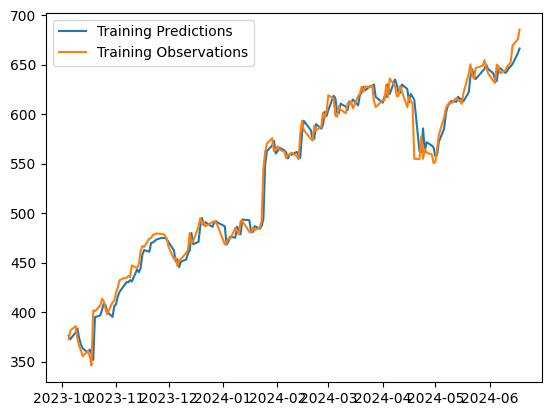

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


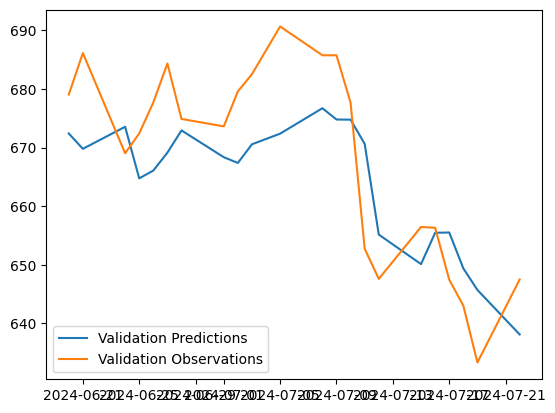

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


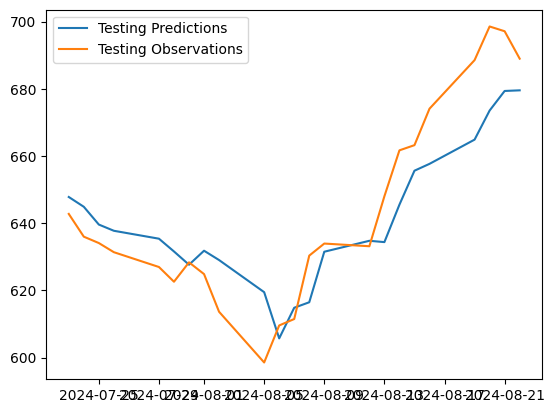

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
